1762.231069024321


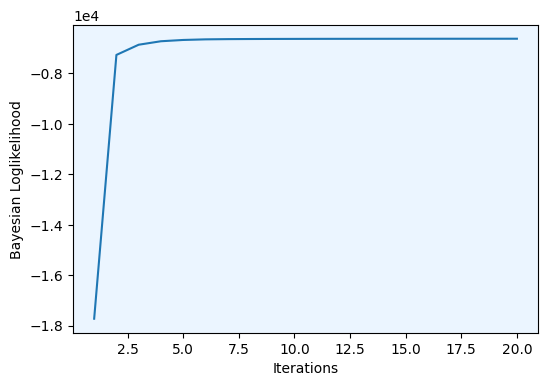

In [10]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('A2Q1.csv', delimiter=',')
num_mixtures = 4
num_initialisations = 100
num_iterations = 20
num_points, dimensions = data.shape
distant_point = np.array([1e9 for _ in range(dimensions)])

def calculate_distance(point1, point2):
    sep = point1 - point2
    return np.sqrt(np.dot(sep, sep))

def calculate_error(data, means, z):
    error = 0
    for i, point in enumerate(data):
        error += calculate_distance(point, means[z[i]])**2

    return error

def update_means(data, z):
    means = np.zeros((num_mixtures, dimensions), dtype='float64')
    num_cluster_points = np.zeros(num_mixtures)

    for i, point in enumerate(data):
        means[z[i]] += point
        num_cluster_points[z[i]] += 1

    for i, mean in enumerate(means):
        if num_cluster_points[i] != 0:
            mean /= num_cluster_points[i]
        else:
            mean = distant_point 

    return means

def update_lambdas(pi, p, data):
    lambdas = np.zeros((num_points, num_mixtures))
    for mixture in range(num_mixtures):
        lambdas[:, mixture] = pi[mixture]*np.prod(p[mixture]**data * (1-p[mixture])**(1-data), axis=1)
    lambdas /= np.sum(lambdas, axis=1, keepdims=True)
    return lambdas

def update_pi(lambdas):
    return np.sum(lambdas, axis=0)/lambdas.shape[0]

def update_p_values(lambdas, data):
    return np.matmul(lambdas.T, data)/np.sum(lambdas, axis=0)[:, np.newaxis]

def calculate_loglikelihood(pi, p, data):
    probab = np.zeros((num_points, num_mixtures))
    for mixture in range(num_mixtures):
        probab[:, mixture] = pi[mixture]*np.prod(p[mixture]**data * (1-p[mixture])**(1-data), axis=1)

    likelihood = 0
    for point_probab in probab:
        likelihood += np.log(np.sum(point_probab))
    return likelihood

error = 0
likelihood = np.zeros(num_iterations)
for _ in range(num_initialisations):
    pi = np.random.rand(num_mixtures)
    pi /= np.sum(pi)
    p_values = np.random.rand(num_mixtures, dimensions)
    for __ in range(num_iterations):
        likelihood[__] += calculate_loglikelihood(pi, p_values, data)
        lambdas = update_lambdas(pi, p_values, data)
        pi = update_pi(lambdas)
        p_values = update_p_values(lambdas, data)
    z = np.zeros(num_points, dtype='int')
    for i, lamb in enumerate(lambdas):
        z[i] = np.argmax(lamb)

    means = update_means(data, z)
    error += calculate_error(data, means, z)
error /= num_initialisations
likelihood /= num_initialisations

# K-means error by alloting the data points to highest probable cluster
print(error)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(np.linspace(1, num_iterations, num_iterations), likelihood)
ax.set_xlabel("Iterations")
ax.set_ylabel("Bayesian Loglikelihood")
ax.set_facecolor('#ebf5ff')
ax.ticklabel_format(scilimits=(-5, 2))
plt.savefig('images/Q1/Bayesian EM')
plt.show()